In [1]:
import pandas as pd
import numpy as np
import string
import spacy
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
from wordcloud.wordcloud import WordCloud

In [1]:
pip install wordcloud

  Using cached wordcloud-1.8.2.2-cp39-cp39-win_amd64.whl (153 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
afinn=pd.read_csv('C:\\Users\\kkdk0001\\Desktop\\DA\\DS\\Assignments\\Text Mining\\Afinn.csv',encoding='latin-1')
afinn.head(2)

,word,value
0,abandon,-2
1,abandoned,-2


In [3]:
tw = pd.read_csv('C:\\Users\\kkdk0001\\Desktop\\DA\\DS\\Assignments\\Text Mining\\Elon_musk.csv',encoding='latin-1')
tw.head(2)

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...


In [37]:
tw1=tw.iloc[:,[1]]
tw1.head(2)

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...


In [31]:
tw1.info

<bound method DataFrame.info of                                                    Text
0                                @kunalb11 Im an alien
1     @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2                   @joerogan @Spotify Great interview!
3                       @gtera27 Doge is underestimated
4     @teslacn Congratulations Tesla China for amazi...
...                                                 ...
1994  @flcnhvy True, it sounds so surreal, but the n...
1995  @PPathole Make sure to read ur terms &amp; con...
1996                @TeslaGong @PPathole Samwise Gamgee
1997  @PPathole Altho Dumb and Dumber is <U+0001F525...
1998                          Progress update August 28

[1999 rows x 1 columns]>

In [38]:
tw1=[Text.strip() for Text in tw1.Text]


In [39]:
tw1=[Text for Text in tw1 if Text]

In [5]:
import nltk
nltk.download('punkt')

from nltk import word_tokenize,sent_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kkdk0001\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [9]:
from nltk import tokenize

In [10]:
import math

In [40]:
sentences = tokenize.sent_tokenize(" ".join(tw1))

In [47]:
sent_df=pd.DataFrame(sentences,columns=['sentences'])
sent_df.head(5)

,sentences
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!


In [51]:
affinity_score=afinn.set_index('word')['value'].to_dict() # Converting the afinn words and values to dictionary

In [54]:
affinity_score

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [84]:
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_score

In [99]:
def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [87]:
# test


In [116]:
calculate_sentiment(text='bad')

-3

In [107]:
sent_df['sentiment_value']=sent_df['sentences'].apply(calculate_sentiment)

In [109]:
sent_df['sentiment_value']

0      0
1      0
2      3
3      3
4      0
      ..
919    0
920   -4
921    0
922   -2
923    0
Name: sentiment_value, Length: 924, dtype: int64

In [112]:
sent_df.shape

(924, 2)

In [114]:
sent_df.head()

,sentences,sentiment_value
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0
1,Have you tried it?,0
2,@joerogan @Spotify Great interview!,3
3,@gtera27 Doge is underestimated @teslacn Congr...,3
4,Now on to the next for even more!!,0


In [118]:
sent_df.sort_values(by='sentiment_value').head(10)

,sentences,sentiment_value
647,Very ba https://t.co/tJsh1Exz1Q @justpaulinel...,-8
64,"Also, the road to hell is mostly paved with ba...",-7
837,Cool Model 3 review by @iamjamiefoxx https://t...,-6
680,"Occasional flights from land are ok, but frequ...",-4
886,This is primarily an electrical/electronic (ch...,-4
611,"Then static fire, checkouts, static fire, fly ...",-4
920,"It may never pay out, as the stock cant b ht...",-4
744,@TimFernholz So why is this madness acceptable...,-3
380,No problem if theres a way get current design...,-3
219,@RGVaerialphotos It will be real soon @MarcusH...,-3


In [120]:
sent_df.sort_values(by='sentiment_value').tail(10)

,sentences,sentiment_value
159,@harsimranbansal @heydave7 It will most likely...,11
151,"@GUNMTLM3 @lexfridman No, but definitely this ...",11
817,Might be able to https://t.co/FB7e5nOq2E @Pri...,11
184,"Also, w https://t.co/IYdKttVsqk @cleantechnic...",12
81,@teslaownersSV This is a good one @MrBeastYT I...,13
645,Its https://t.co/IxhyT6NuiC @Teslarati Tesla...,13
585,The open areas https://t.co/rabjKrtQlw @Sav...,14
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",15
719,We just havent observed the https://t.co/mez...,15
105,@Erdayastronaut @SpaceX Was also thinking that...,16


In [129]:
sent_df['Word_count']=sent_df['sentences'].str.split().apply(len)

In [130]:
sent_df.head()

,sentences,sentiment_value,Word_count
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
2,@joerogan @Spotify Great interview!,3,4
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13
4,Now on to the next for even more!!,0,8


In [125]:
sent_df['sentiment_value'].describe()

count    924.00000
mean       1.37013
std        2.67799
min       -8.00000
25%        0.00000
50%        0.00000
75%        3.00000
max       16.00000
Name: sentiment_value, dtype: float64

In [126]:
# Inferance as the Mean value is 1.37 it indicates that the overall tweets are positively positively skewed 

In [136]:
import seaborn as sns


<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

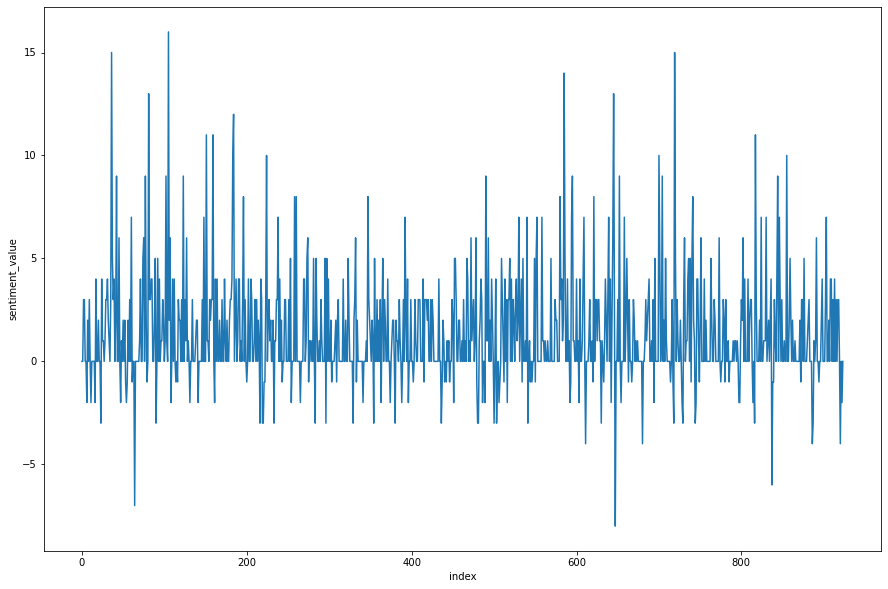

In [137]:
sent_df['index']=range(0,len(sent_df))
plt.figure(figsize=(15,10))
sns.lineplot(x='index',y='sentiment_value',data=sent_df)

<AxesSubplot:xlabel='Word_count', ylabel='sentiment_value'>

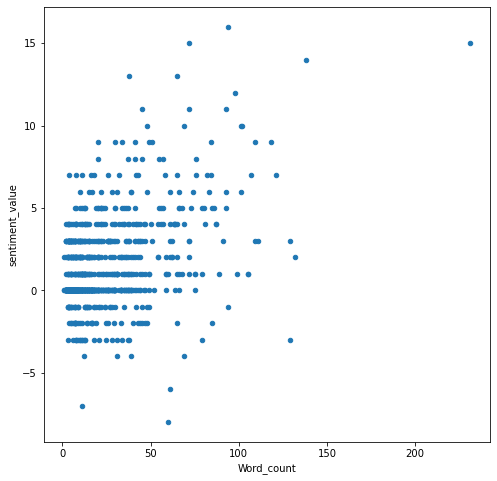

In [138]:
sent_df.plot.scatter(x='Word_count',y='sentiment_value',figsize=(8,8))

C:\Users\kkdk0001\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

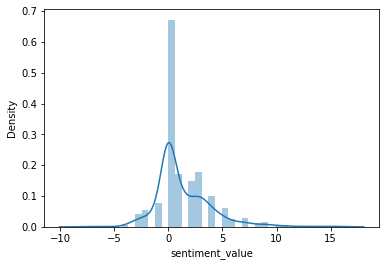

In [140]:
sns.distplot(sent_df['sentiment_value'])